<a href="https://colab.research.google.com/github/dimartinezr/Challenge_TelecomX_2_Alura/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [8]:
df = pd.read_json('/content/TelecomX_Data.json')
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [9]:
cols_dict = ['customer', 'phone', 'internet', 'account']

df_expanded = pd.concat(
    [df.drop(columns=cols_dict)] +
    [pd.json_normalize(df[col]).add_prefix(f"{col}_") for col in cols_dict],
    axis=1
)

df_expanded.head(50)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [10]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [11]:
df_expanded.loc[df_expanded["Churn"] == "Yes", "Churn"] = 1
df_expanded.loc[df_expanded["Churn"] == "No", "Churn"] = 0
df_expanded.loc[df_expanded["Churn"] == "", "Churn"] = np.nan

In [12]:
df_expanded = df_expanded.dropna(subset=["Churn"]).reset_index(drop=True)

In [13]:
df_expanded['Churn'] = df_expanded['Churn'].astype(int)

In [14]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   objec

In [15]:
df_expanded.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [16]:
df_expanded['customer_gender'] = df_expanded['customer_gender'].map({'Female': 0, 'Male': 1})

In [17]:
df_expanded.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,0,0,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,0,1,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,1,1,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1,1,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,0,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [18]:
df_expanded['internet_OnlineSecurity'].head()

,internet_OnlineSecurity
0,No
1,No
2,No
3,No
4,No


In [19]:
df_expanded['customer_Partner'] = df_expanded['customer_Partner'].map({'No': 0, 'Yes': 1})
df_expanded['customer_Dependents'] = df_expanded['customer_Dependents'].map({'No': 0, 'Yes': 1})
df_expanded['phone_PhoneService'] = df_expanded['phone_PhoneService'].map({'No': 0, 'Yes': 1, 'No phone service': 0})
df_expanded['phone_MultipleLines'] = df_expanded['phone_MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 0})
df_expanded['internet_OnlineBackup'] = df_expanded['internet_OnlineBackup'].map({'No': 0, 'Yes': 1, 'No internet service':0})
df_expanded['internet_DeviceProtection'] = df_expanded['internet_DeviceProtection'].map({'No': 0, 'Yes': 1, 'No internet service':0})
df_expanded['internet_TechSupport'] = df_expanded['internet_TechSupport'].map({'No': 0, 'Yes': 1, 'No internet service':0})
df_expanded['internet_StreamingTV'] = df_expanded['internet_StreamingTV'].map({'No': 0, 'Yes': 1, 'No internet service':0})
df_expanded['internet_StreamingMovies'] = df_expanded['internet_StreamingMovies'].map({'No': 0, 'Yes': 1, 'No internet service':0})
df_expanded['account_PaperlessBilling'] = df_expanded['account_PaperlessBilling'].map({'No': 0, 'Yes': 1})
df_expanded['internet_OnlineSecurity'] = df_expanded['internet_OnlineSecurity'].map({'No': 0, 'Yes': 1, 'No internet service':0})

In [20]:
df_expanded.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.3
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4


In [21]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   int64  
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   int64  
 5   customer_Dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   int64  
 8   phone_MultipleLines        7043 non-null   int64  
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   int64  
 11  internet_OnlineBackup      7043 non-null   int64  
 12  internet_DeviceProtection  7043 non-null   int64  
 13  internet_TechSupport       7043 non-null   int64

In [22]:
pd.get_dummies(df_expanded['internet_InternetService'], prefix='internet_InternetService')

,internet_InternetService_DSL,internet_InternetService_Fiber optic,internet_InternetService_No
0,True,False,False
1,True,False,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
7038,True,False,False
7039,False,True,False
7040,True,False,False
7041,True,False,False


In [23]:
df_expanded = pd.concat([df_expanded, pd.get_dummies(df_expanded['internet_InternetService'], prefix='internet_InternetService')], axis=1)
df_expanded = df_expanded.drop(['internet_InternetService'], axis=1)

In [24]:
df_expanded.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,...,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,internet_InternetService_DSL,internet_InternetService_Fiber optic,internet_InternetService_No
0,0002-ORFBO,0,0,0,1,1,9,1,0,0,...,1,0,One year,1,Mailed check,65.6,593.3,True,False,False
1,0003-MKNFE,0,1,0,0,0,9,1,1,0,...,0,1,Month-to-month,0,Mailed check,59.9,542.4,True,False,False
2,0004-TLHLJ,1,1,0,0,0,4,1,0,0,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,False,True,False
3,0011-IGKFF,1,1,1,1,0,13,1,0,0,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,False,True,False
4,0013-EXCHZ,1,0,1,1,0,3,1,0,0,...,1,0,Month-to-month,1,Mailed check,83.9,267.4,False,True,False


In [25]:
pd.get_dummies(df_expanded['account_Contract'], prefix='account_Contract')

,account_Contract_Month-to-month,account_Contract_One year,account_Contract_Two year
0,False,True,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
7038,False,True,False
7039,True,False,False
7040,True,False,False
7041,False,False,True


In [26]:
df_expanded = pd.concat([df_expanded, pd.get_dummies(df_expanded['account_Contract'], prefix='account_Contract')], axis=1)
df_expanded = df_expanded.drop(['account_Contract'], axis=1)

In [27]:
df_expanded.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,...,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total,internet_InternetService_DSL,internet_InternetService_Fiber optic,internet_InternetService_No,account_Contract_Month-to-month,account_Contract_One year,account_Contract_Two year
0,0002-ORFBO,0,0,0,1,1,9,1,0,0,...,1,Mailed check,65.6,593.3,True,False,False,False,True,False
1,0003-MKNFE,0,1,0,0,0,9,1,1,0,...,0,Mailed check,59.9,542.4,True,False,False,True,False,False
2,0004-TLHLJ,1,1,0,0,0,4,1,0,0,...,1,Electronic check,73.9,280.85,False,True,False,True,False,False
3,0011-IGKFF,1,1,1,1,0,13,1,0,0,...,1,Electronic check,98.0,1237.85,False,True,False,True,False,False
4,0013-EXCHZ,1,0,1,1,0,3,1,0,0,...,1,Mailed check,83.9,267.4,False,True,False,True,False,False


In [28]:
pd.get_dummies(df_expanded['account_PaymentMethod'], prefix='account_PaymentMethod')

,account_PaymentMethod_Bank transfer (automatic),account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,False,False,False,True
1,False,False,False,True
2,False,False,True,False
3,False,False,True,False
4,False,False,False,True
...,...,...,...,...
7038,False,False,False,True
7039,False,False,True,False
7040,False,False,False,True
7041,False,False,False,True


In [29]:
df_expanded = pd.concat([df_expanded, pd.get_dummies(df_expanded['account_PaymentMethod'], prefix='account_PaymentMethod')], axis=1)
df_expanded = df_expanded.drop(['account_PaymentMethod'], axis=1)

In [30]:
df_expanded.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,...,internet_InternetService_DSL,internet_InternetService_Fiber optic,internet_InternetService_No,account_Contract_Month-to-month,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Bank transfer (automatic),account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0002-ORFBO,0,0,0,1,1,9,1,0,0,...,True,False,False,False,True,False,False,False,False,True
1,0003-MKNFE,0,1,0,0,0,9,1,1,0,...,True,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,1,1,0,0,0,4,1,0,0,...,False,True,False,True,False,False,False,False,True,False
3,0011-IGKFF,1,1,1,1,0,13,1,0,0,...,False,True,False,True,False,False,False,False,True,False
4,0013-EXCHZ,1,0,1,1,0,3,1,0,0,...,False,True,False,True,False,False,False,False,False,True


In [31]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   customerID                                       7043 non-null   object 
 1   Churn                                            7043 non-null   int64  
 2   customer_gender                                  7043 non-null   int64  
 3   customer_SeniorCitizen                           7043 non-null   int64  
 4   customer_Partner                                 7043 non-null   int64  
 5   customer_Dependents                              7043 non-null   int64  
 6   customer_tenure                                  7043 non-null   int64  
 7   phone_PhoneService                               7043 non-null   int64  
 8   phone_MultipleLines                              7043 non-null   int64  
 9   internet_OnlineSecurity       

In [32]:
df_expanded = df_expanded.astype({col: int for col in df_expanded.select_dtypes(bool).columns})
#df_expanded['internet_InternetService_DSL'] = df_expanded['internet_InternetService_DSL'].astype(int)
#df_expanded['internet_InternetService_Fiber optic'] = df_expanded['internet_InternetService_Fiber optic'].astype(int)
#df_expanded['internet_InternetService_No'] = df_expanded['internet_InternetService_No'].astype(int)
#df_expanded['account_Contract_Month-to-month'] = df_expanded['account_Contract_Month-to-month'].astype(int)
#df_expanded['account_Contract_One year'] = df_expanded['account_Contract_One year'].astype(int)
#df_expanded['account_Contract_Two year'] = df_expanded['account_Contract_Two year'].astype(int)
#df_expanded['account_PaymentMethod_Bank transfer (automatic)'] = df_expanded['account_PaymentMethod_Bank transfer (automatic)'].astype(int)
#df_expanded['account_PaymentMethod_Credit card (automatic)'] = df_expanded['account_PaymentMethod_Credit card (automatic)'].astype(int)
#df_expanded['account_PaymentMethod_Electronic check'] = df_expanded['account_PaymentMethod_Electronic check'].astype(int)
#df_expanded['account_PaymentMethod_Mailed check'] = df_expanded['account_PaymentMethod_Mailed check'].astype(int)

In [33]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   customerID                                       7043 non-null   object 
 1   Churn                                            7043 non-null   int64  
 2   customer_gender                                  7043 non-null   int64  
 3   customer_SeniorCitizen                           7043 non-null   int64  
 4   customer_Partner                                 7043 non-null   int64  
 5   customer_Dependents                              7043 non-null   int64  
 6   customer_tenure                                  7043 non-null   int64  
 7   phone_PhoneService                               7043 non-null   int64  
 8   phone_MultipleLines                              7043 non-null   int64  
 9   internet_OnlineSecurity       

In [34]:
df_expanded['account_Charges.Total'][1005]

'2066'

In [35]:
df_expanded["account_Charges.Total"] = (
    df_expanded["account_Charges.Total"]
    .str.strip()
    .replace("", "0")
    .str.replace(",", "", regex=False)
    .astype(float)
)

In [36]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   customerID                                       7043 non-null   object 
 1   Churn                                            7043 non-null   int64  
 2   customer_gender                                  7043 non-null   int64  
 3   customer_SeniorCitizen                           7043 non-null   int64  
 4   customer_Partner                                 7043 non-null   int64  
 5   customer_Dependents                              7043 non-null   int64  
 6   customer_tenure                                  7043 non-null   int64  
 7   phone_PhoneService                               7043 non-null   int64  
 8   phone_MultipleLines                              7043 non-null   int64  
 9   internet_OnlineSecurity       

In [37]:
df_expanded['account_Charges.Diary'] = df_expanded['account_Charges.Monthly'] / 30

In [38]:
df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   customerID                                       7043 non-null   object 
 1   Churn                                            7043 non-null   int64  
 2   customer_gender                                  7043 non-null   int64  
 3   customer_SeniorCitizen                           7043 non-null   int64  
 4   customer_Partner                                 7043 non-null   int64  
 5   customer_Dependents                              7043 non-null   int64  
 6   customer_tenure                                  7043 non-null   int64  
 7   phone_PhoneService                               7043 non-null   int64  
 8   phone_MultipleLines                              7043 non-null   int64  
 9   internet_OnlineSecurity       

#📊 Carga y análisis

In [39]:
df_expanded[["account_Charges.Total", "account_Charges.Diary", "account_Charges.Monthly", "customer_tenure"]].describe()

,account_Charges.Total,account_Charges.Diary,account_Charges.Monthly,customer_tenure
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,2279.734304,2.158723,64.761692,32.371149
std,2266.794470,1.003002,30.090047,24.559481
min,0.000000,0.608333,18.250000,0.000000
25%,398.550000,1.183333,35.500000,9.000000
50%,1394.550000,2.345000,70.350000,29.000000
75%,3786.600000,2.995000,89.850000,55.000000
max,8684.800000,3.958333,118.750000,72.000000


In [40]:
categorical_columns = df_expanded.select_dtypes(include=['int64']).columns
categorical_columns = categorical_columns.drop('customer_tenure')
categorical_columns

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'phone_PhoneService',
       'phone_MultipleLines', 'internet_OnlineSecurity',
       'internet_OnlineBackup', 'internet_DeviceProtection',
       'internet_TechSupport', 'internet_StreamingTV',
       'internet_StreamingMovies', 'account_PaperlessBilling',
       'internet_InternetService_DSL', 'internet_InternetService_Fiber optic',
       'internet_InternetService_No', 'account_Contract_Month-to-month',
       'account_Contract_One year', 'account_Contract_Two year',
       'account_PaymentMethod_Bank transfer (automatic)',
       'account_PaymentMethod_Credit card (automatic)',
       'account_PaymentMethod_Electronic check',
       'account_PaymentMethod_Mailed check'],
      dtype='object')

In [41]:
proporciones_categorias = df_expanded[categorical_columns].mean()
pd.DataFrame(proporciones_categorias)
proporciones_categorias

,0
Churn,0.265370
customer_gender,0.504756
customer_SeniorCitizen,0.162147
customer_Partner,0.483033
customer_Dependents,0.299588
phone_PhoneService,0.903166
phone_MultipleLines,0.421837
internet_OnlineSecurity,0.286668
internet_OnlineBackup,0.344881
internet_DeviceProtection,0.343888


In [42]:
moda_categorias = df_expanded[categorical_columns].mode().iloc[0]
pd.DataFrame(moda_categorias)
moda_categorias

,0
Churn,0
customer_gender,1
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
phone_PhoneService,1
phone_MultipleLines,0
internet_OnlineSecurity,0
internet_OnlineBackup,0
internet_DeviceProtection,0


In [43]:
df_expanded['Churn'].value_counts(normalize=True).round(4)*100
proporcion_evasion_clientes = df_expanded['Churn'].value_counts(normalize=True).round(4)*100
pd.DataFrame(proporcion_evasion_clientes)
proporcion_evasion_clientes.rename(index={0: 'Permanece', 1: 'Dado de Baja'}, inplace=True)
proporcion_evasion_clientes

#El 26% de los clientes se dieron de baja

,proportion
Churn,
Permanece,73.46
Dado de Baja,26.54


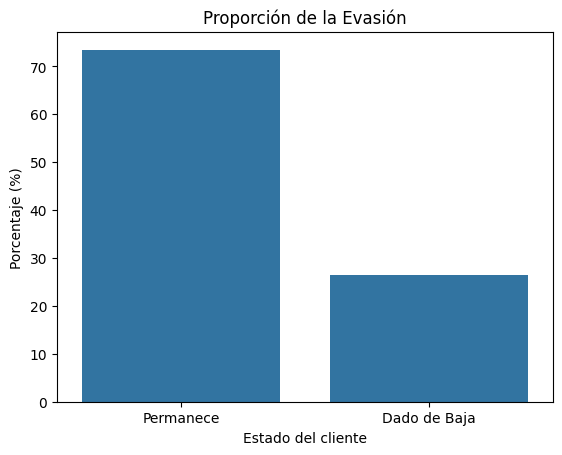

In [44]:
ax = sns.barplot(
    x=proporcion_evasion_clientes.index,
    y=proporcion_evasion_clientes.values,
)

# Ahora puedes aplicarle métodos
ax.set_title("Proporción de la Evasión")
ax.set_ylabel("Porcentaje (%)")
ax.set_xlabel("Estado del cliente")

# Mostrar
plt.show()

In [45]:
proporciones_bajas = df_expanded[df_expanded['Churn'] == 1][[col for col in categorical_columns if col != 'Churn']] \
                      .apply(lambda x: x.value_counts(normalize=True).round(4)*100)
pd.DataFrame(proporciones_bajas)
proporciones_bajas

,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,...,internet_InternetService_DSL,internet_InternetService_Fiber optic,internet_InternetService_No,account_Contract_Month-to-month,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Bank transfer (automatic),account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,50.24,74.53,64.21,82.56,9.1,54.52,84.22,72.02,70.84,83.41,...,75.44,30.6,93.95,11.45,91.12,97.43,86.2,87.59,42.7,83.52
1,49.76,25.47,35.79,17.44,90.9,45.48,15.78,27.98,29.16,16.59,...,24.56,69.4,6.05,88.55,8.88,2.57,13.8,12.41,57.3,16.48


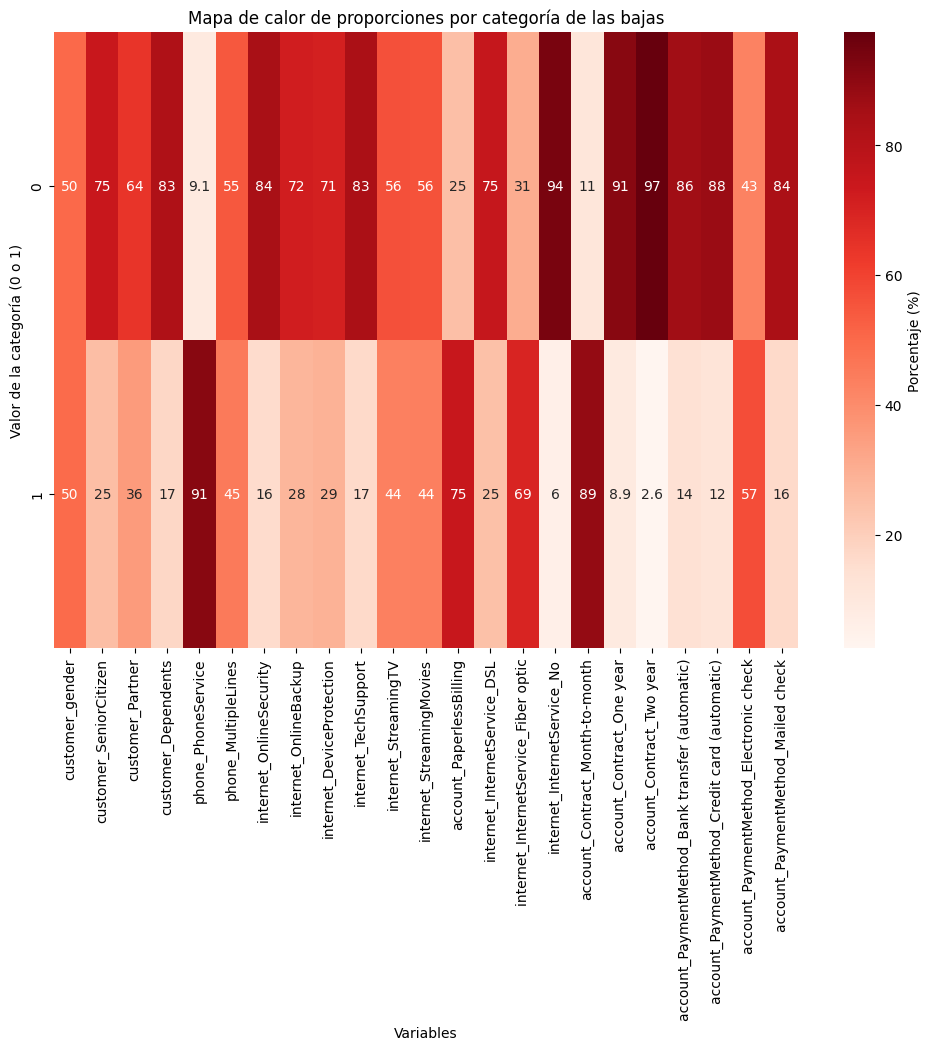

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(proporciones_bajas, annot=True, cmap="Reds", cbar_kws={'label': 'Porcentaje (%)'})
plt.title("Mapa de calor de proporciones por categoría de las bajas")
plt.ylabel("Valor de la categoría (0 o 1)")
plt.xlabel("Variables")
plt.show()


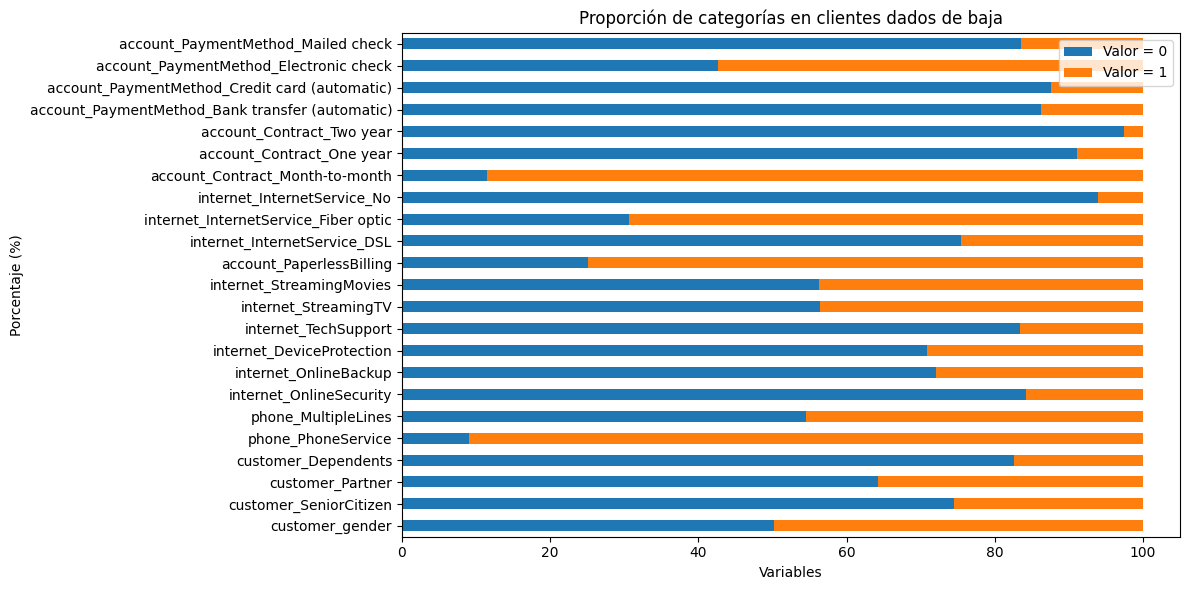

In [47]:
proporciones_bajas_T = proporciones_bajas.T

proporciones_bajas_T.plot(
    kind='barh',
    stacked=True,
    figsize=(12, 6),
    color=['#1f77b4', '#ff7f0e'],
)

plt.title("Proporción de categorías en clientes dados de baja")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Variables")
plt.legend(["Valor = 0", "Valor = 1"])
plt.tight_layout()
plt.show()


In [48]:
variables_numericas = df_expanded[["account_Charges.Total", "account_Charges.Diary", "account_Charges.Monthly", "customer_tenure", "Churn"]]
variables_numericas['Churn'] = variables_numericas['Churn'].map({0: 'Permanece', 1: 'Dado de Baja'})
variables_numericas.head()

,account_Charges.Total,account_Charges.Diary,account_Charges.Monthly,customer_tenure,Churn
0,593.30,2.186667,65.6,9,Permanece
1,542.40,1.996667,59.9,9,Permanece
2,280.85,2.463333,73.9,4,Dado de Baja
3,1237.85,3.266667,98.0,13,Dado de Baja
4,267.40,2.796667,83.9,3,Dado de Baja


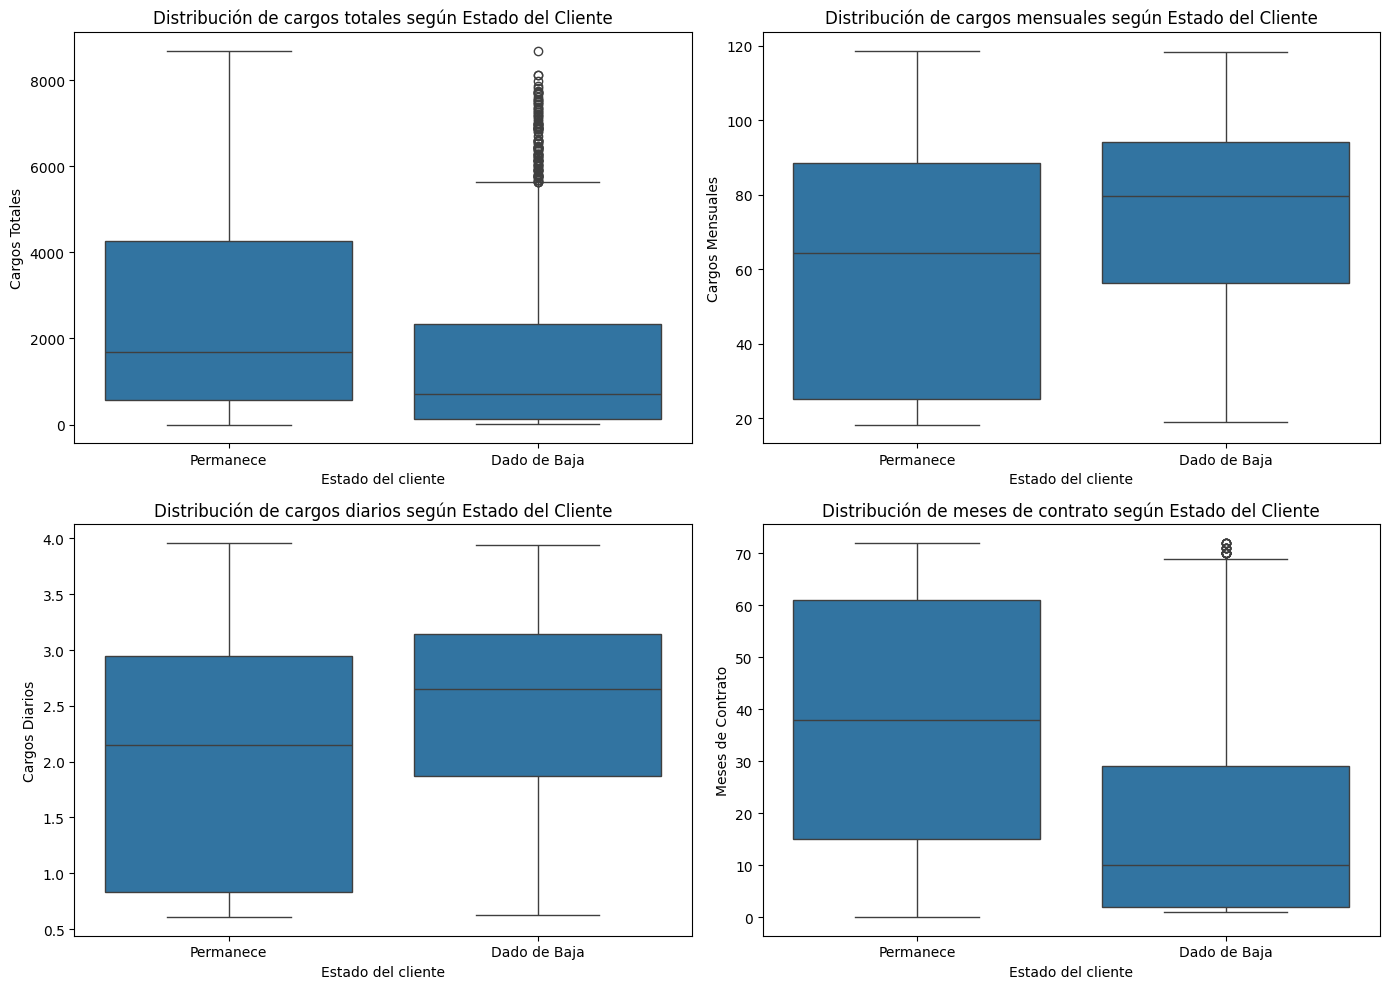

In [49]:
# Crear figura con 2 filas y 2 columnas de subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# BoxPlot Cargos Totales
sns.boxplot(data=variables_numericas, x="Churn", y="account_Charges.Total", ax=axes[0,0])
axes[0,0].set_title("Distribución de cargos totales según Estado del Cliente")
axes[0,0].set_xlabel("Estado del cliente")
axes[0,0].set_ylabel("Cargos Totales")

# BoxPlot Cargos Mensuales
sns.boxplot(data=variables_numericas, x="Churn", y="account_Charges.Monthly", ax=axes[0,1])
axes[0,1].set_title("Distribución de cargos mensuales según Estado del Cliente")
axes[0,1].set_xlabel("Estado del cliente")
axes[0,1].set_ylabel("Cargos Mensuales")

# BoxPlot Cargos Diarios
sns.boxplot(data=variables_numericas, x="Churn", y="account_Charges.Diary", ax=axes[1,0])
axes[1,0].set_title("Distribución de cargos diarios según Estado del Cliente")
axes[1,0].set_xlabel("Estado del cliente")
axes[1,0].set_ylabel("Cargos Diarios")

# BoxPlot Meses de Contrato
sns.boxplot(data=variables_numericas, x="Churn", y="customer_tenure", ax=axes[1,1])  # ojo con mayúsculas/minúsculas
axes[1,1].set_title("Distribución de meses de contrato según Estado del Cliente")
axes[1,1].set_xlabel("Estado del cliente")
axes[1,1].set_ylabel("Meses de Contrato")

# Ajustar espacio para que no se solapen los títulos
plt.tight_layout()
plt.show()


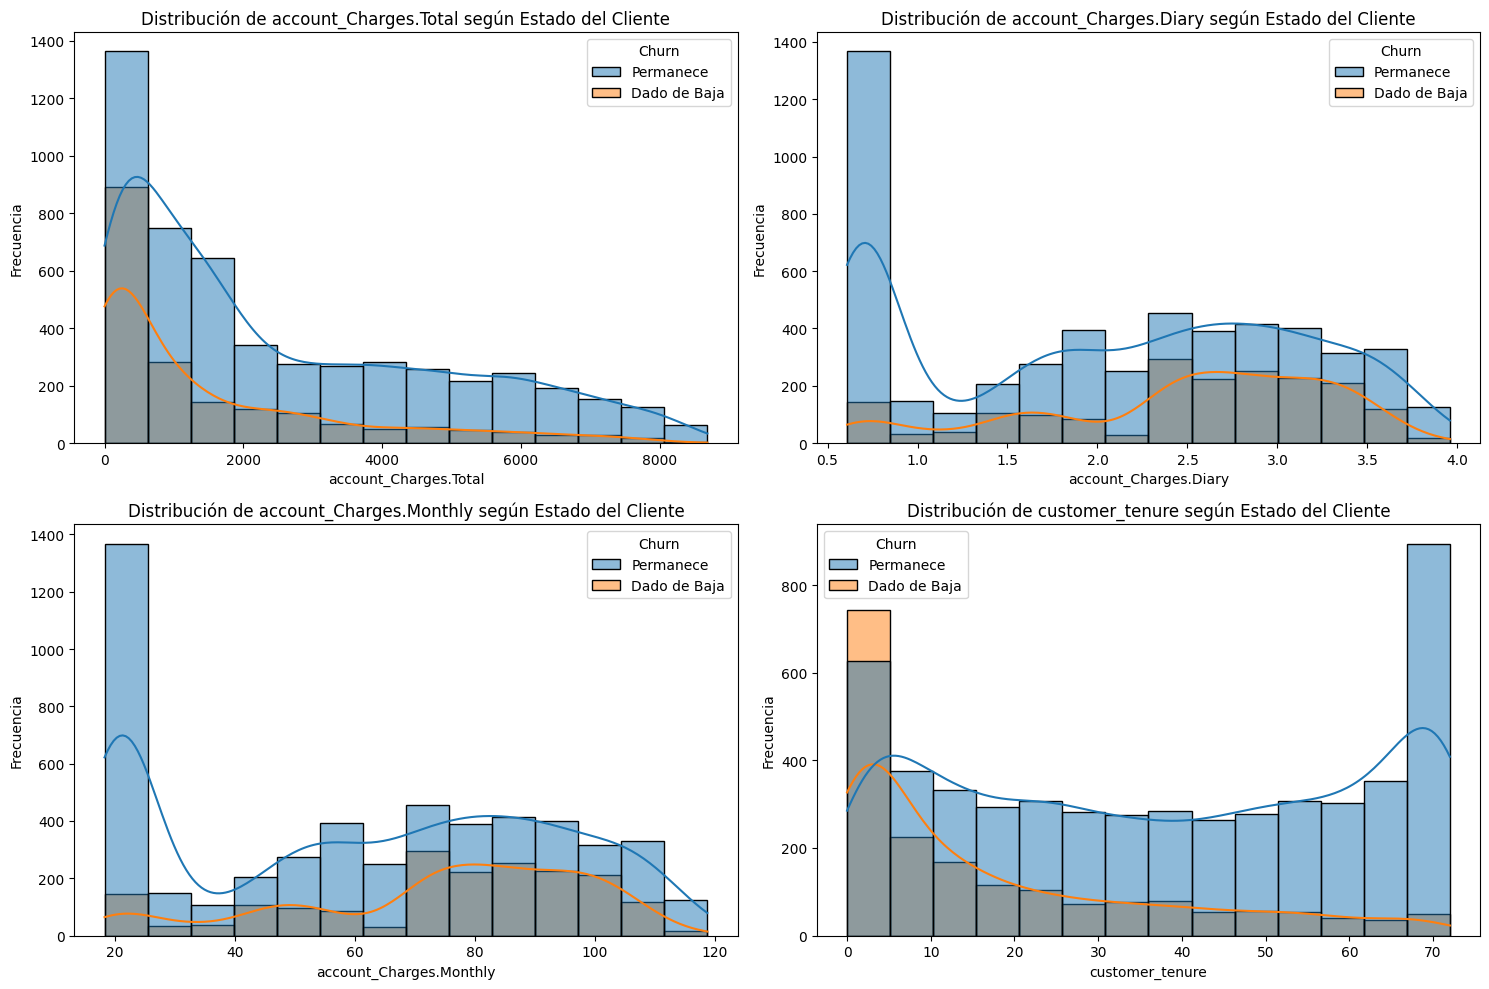

In [50]:
#Diagramas de Frecuencia
# Definir cuántas variables quieres graficar
columnas = variables_numericas.drop(columns=["Churn"]).columns
n = len(columnas)

# Definir el tamaño del grid de subplots (2 columnas por fila)
filas = (n // 2) + (n % 2 > 0)
columnas_grid = 2

fig, axes = plt.subplots(filas, columnas_grid, figsize=(15, 5*filas))
axes = axes.flatten()

# Crear un histograma para cada variable
for i, col in enumerate(columnas):
    n_obs = variables_numericas[col].dropna().shape[0]  # número de observaciones válidas
    bins_sturges = int(np.ceil(1 + np.log2(n_obs)))    # regla de Sturges

    sns.histplot(data=variables_numericas, x=col, hue="Churn", kde=True, bins=bins_sturges, ax=axes[i])
    axes[i].set_title(f"Distribución de {col} según Estado del Cliente")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")

# Eliminar ejes vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#📄Informe final

##Introducción

El presente informe tiene como objetivo exponer mediante métricas y visulizaciones obtenidas a partir de un exhaustivo proceso de ETL de los datos de la compañía Telecom X, los principales indicadores de deserción de los clientes y posibles estrategias de retención. En primer lugar se describe como se realizó la limpieza y tratamiento de los datos; en segundo lugar se expone un análisis exploratorio de los datos; en tercer lugar se muestran los principales resultados y por ultimo se dan recomendaciones estrategicas basadas en los resultados para mejorar los indicadores de retención.

##Transformación y Tratamiento de los Datos

Inicialmente se cargaron los datos codificados en un archivo .json, y se hicieron las respectivas normalizaciones multinivel para obtener un dataframe plano.

Posteriormente se verificó el número de observaciones iniciales (7267) y se estudiaron los datos de la variable de estudio "Churn" asociada a la evasión de clientes. Debido a que algunos registros tenían datos de evasión (Churn) faltantes, se decidió eliminarlos debido a su baja representatividad y el ruido que pueden generar en el análisis. Finalmente se trabajo con una muestra de 7043 registros.

Luego de clasificar adecuadamente las variables categóricas y numéricas, se procedió a hacer las respectivas transformaciones. Para las variables categóricas se estandarizaron mediante el proceso One - Hot Encoding (OHE). Las variables numéricas, se limpiaron adecuadamente para almacenarlas como tipo float para el caso de los datos de facturación y como entero para los datos de meses de contratación.

## Análisis Exploratorio de Datos

La tasa de deserción de clientes es del 26.54%, lo que indica que por cada 10 clientes, aproximadamente 3 desertan de su servicio adquirido con Telecom X.

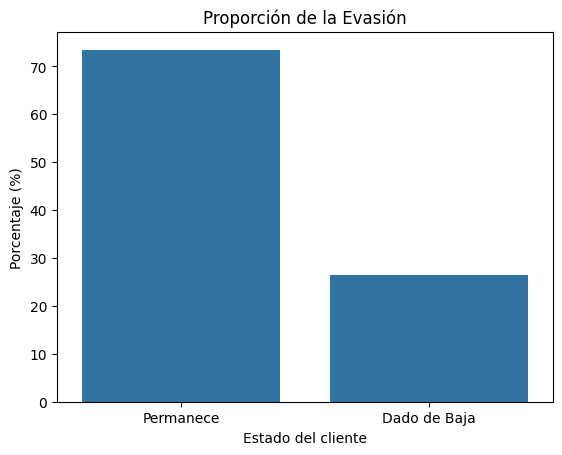

Al observar los valores positivos de las variables categóricas que describen el comportamiento de los clientes que dieron de baja el servicio. Se observa que el 91% de los clientes que se dieron de baja poseían un servicio de telefonía. El 89% prefería un contrato mes a mes. El 75% prefería recibir su factura en linea. Si bien el 91% tenían contratado un servicio de internet (69% contrató un servicio de internet por fibra óptica), la mayoría de los evasores optó por no contratar sevicios complementarios. El 57% hacía el pago de forma no automática mediante una vía electrónica.

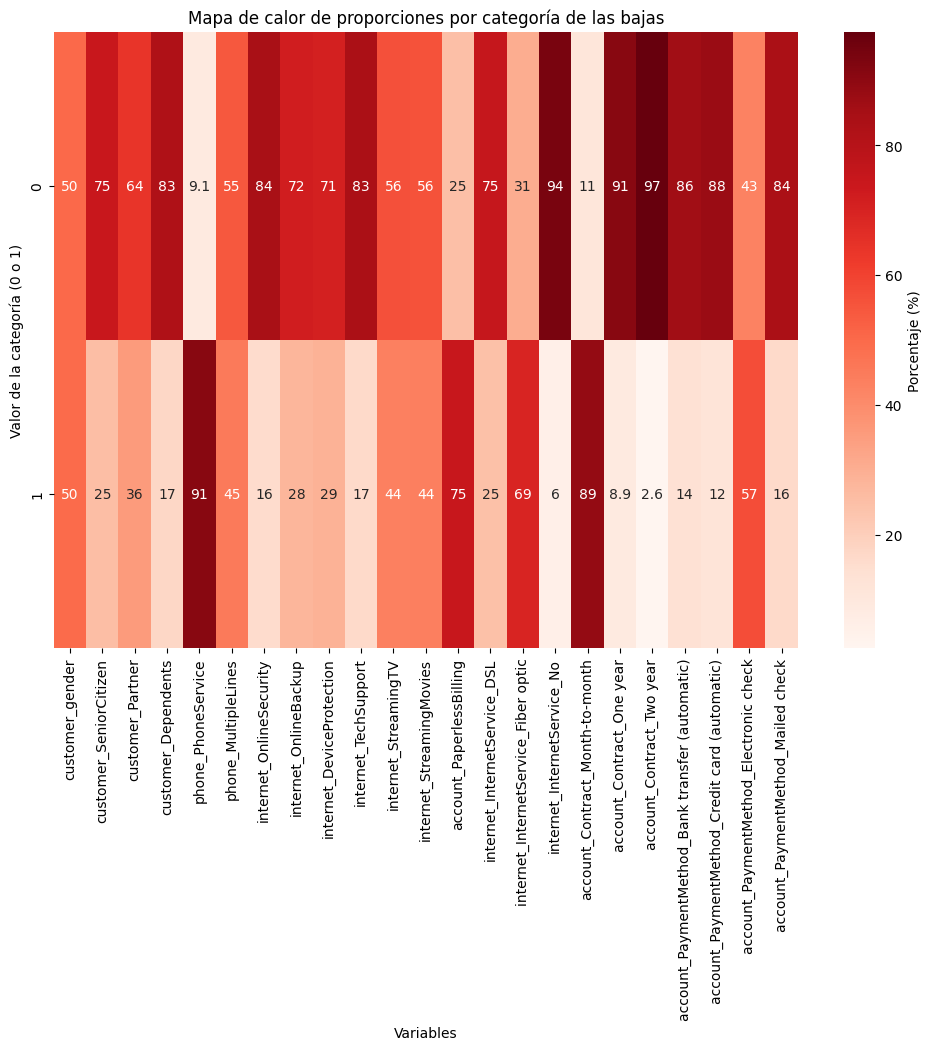

La distribución de las variables númericas permite ver diferencias entre el plazo de cargos y los meses de contrato. Según la distribución de cargos totales, la mediana de los clientes que se dieron de baja es menor a los que permanecen. Cuando se observa la distribución de los cargos mensuales y los cargos diarios se observa que la mediana de los clientes que se dieron de baja es superior a la de los clientes que permanecieron. Por ultimo se evidencia que para la distribución de los meses de contrato se observa que la mediana de los clientes que se dieron de baja es menor a la de los clientes que permanecieron.

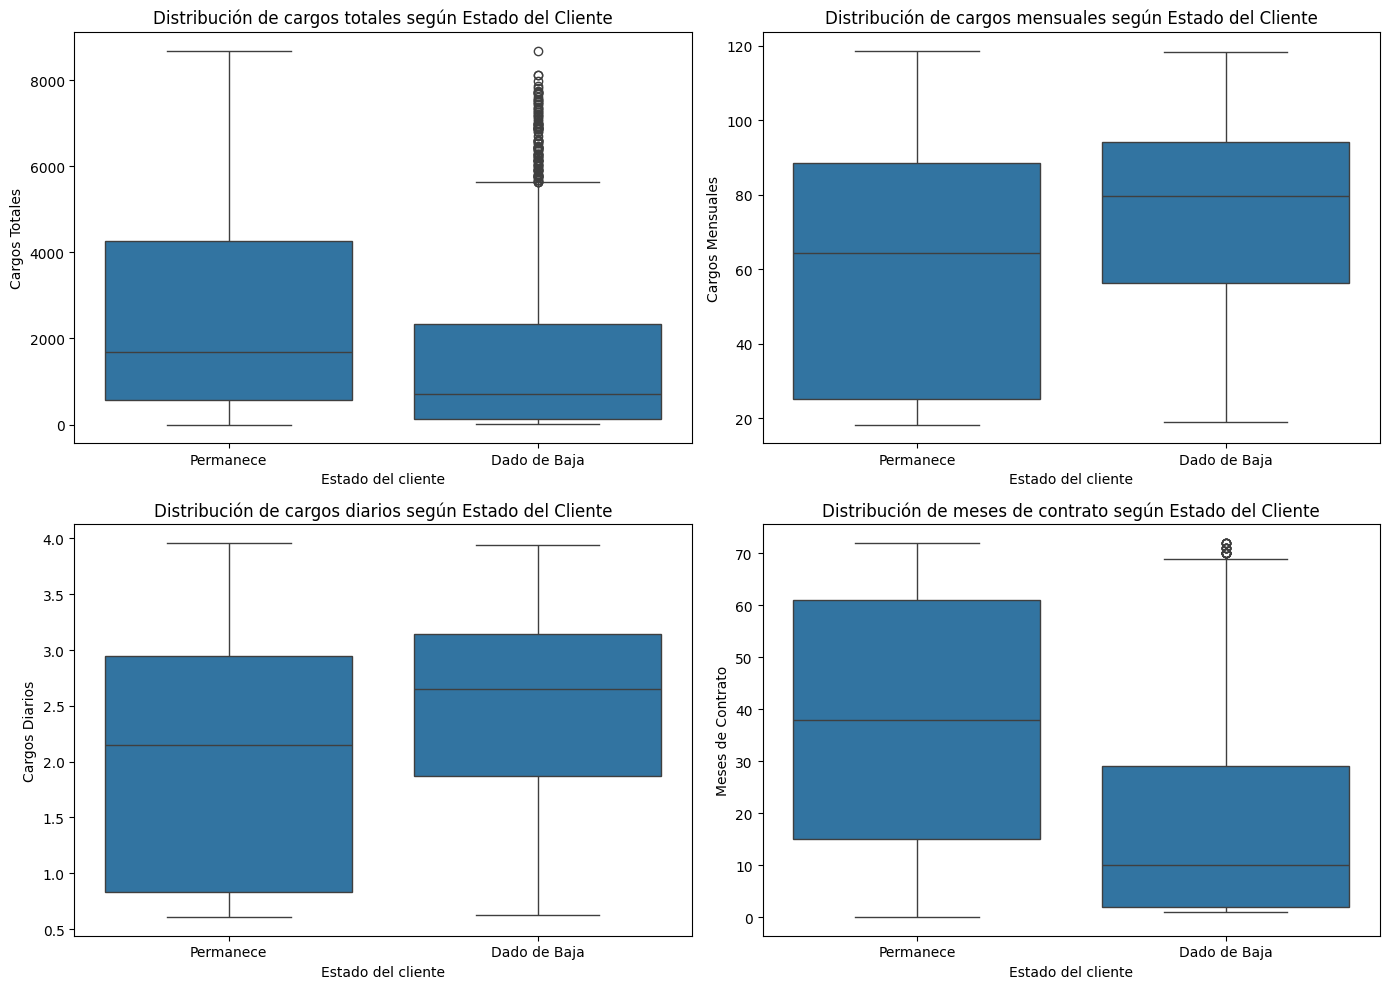

## Principales Resultados



Dentro de los principales hallazgos se resalta que la empresa tiene un alto indice de evasión, pues el 26.54% de los clientes se dan de baja de su servicio. Estas bajas parecen estar influenciadas principalmente por inconformidades con el servicio de telefonía, la corta duración de los periodos de contratación (mes a mes), los servicios de internet de fibra óptica básicos sin servicios complementarios, la no automatización de los pagos, los elevados cargos a corto plazo (diarios y mensuales) y la corta durabilidad de los contratos. Tener en cuenta estos hallazgos es clave para elaborar estrategias orientadas a la retención de los clientes, las cuales se describen en el siguiente apartado.

## Recomendaciones

Con el fin de mejorar la retención de los clientes de Telecom X se elabora una serie de recomendaciones a partir de los principales hallazgos derivados del análisis realizado.

1. La empresa debe verificar a fondo y mejorar la calidad de sus servicios de telefonía, ya que la mayoría de las deserciones estan asociadas a estos. De la misma forma se deben revisar de los servicios de internet de fibra óptica.

2. Es importante ofrecer paquetes de servicios multiples de internet ya que al generar mayor agregado se reducen los incentivos de deserción de los clientes, esto se ve respaldado por la evidencia de que de los desertores, la mayoría tenía un plan básico de internet sin servicios complementarios.

3. Con el fin de mejorar los flujos de caja y al mismo tiempo retener a los clientes, se recomienda aplicar una tarifa de descuento si se paga con un medio de pago automático ya que esto apela directamente al sesgo de estatos quo del consumidor, es probable que parte de la deserción esté explicada por los costos de transacción asociados a la realización del pago no automático.

4. Se recomienda que los servicios se ofrezcan a terminos de contrtatación de largo plazo pero con tarifas inciales reducidas, estas pueden ir aumentando progresivamente conforme avance la temporalidad del contrato para no afectar los margenes de ganancia. Es evidente que las deserciones están asociadas a los altos cargos a corto plazo y la corta durabilidad de los contratos.

Es importante poner en practica cada una de las recomendaciones ya que los datos hablan por si solos, la evasión es elevada aunque recuperable si la compañia hace los esfuerzos necesarios para mejorar la calidad de sus servicios al mismo tiempo que idea estrategias de venta orientadas a la fidelización a largo plazo del consumidor en vez de la rentabilidad inmediata a corto plazo.

In [51]:
df_expanded.to_csv("datos_tratados.csv", index=False)